# 9. Mixture Models and EM

## 9.1 K-means Clustering

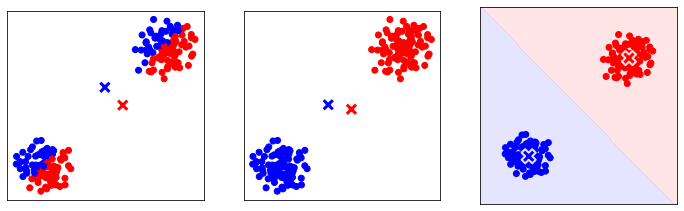

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustering import *


def make_blob():
    cls1 = np.random.normal(size=(100, 2)) + np.array([5, 5])
    cls2 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    return np.vstack([cls1, cls2])

# training data & test data
X_train = make_blob()
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([X, Y]).reshape(2, -1).T

''' k-means '''
model = Kmeans(n_clusters=2)
model.fit(X_train)
Z = model.predict(X_test)


fig = plt.figure(figsize=(12,4))
for n, (key, val) in enumerate(model.centers.items()):
    fig.add_subplot(1, len(model.centers), n+1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=np.where(model.cls_X[key], 'r', 'b'))
    plt.scatter(*model.centers[key].T, s=200, marker='X', lw=2, c=['b', 'r'], edgecolor="white")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.tick_params(bottom=False,left=False)
plt.contourf(X, Y, Z.reshape(X.shape), alpha=0.1, levels=np.linspace(0,1,3), colors=['b', 'r'])
plt.show()